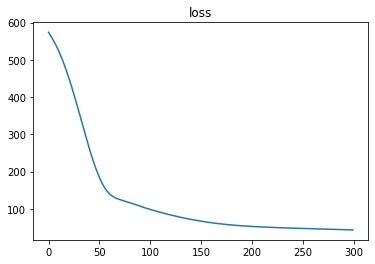

Text(0.5, 1.0, 'prediction')

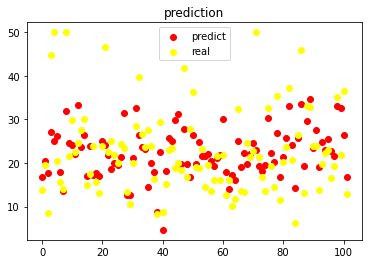

In [21]:
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import numpy as np
data = load_boston()
X = data['data']
y = data['target']
y= y.reshape(-1,1)
#print(y)
from sklearn.preprocessing import MinMaxScaler

import torch

from torch import nn

#进行最大最小规范化
ss = MinMaxScaler()
X = ss.fit_transform(X)

#从numpy转tensor
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)

#拆分数据成训练集和测试集
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2, )

#使用relu, 再加上10个维度的隐藏层，总体感觉越来越傻瓜化，真正的调包侠
model = nn.Sequential(nn.Linear(13,10), nn.ReLU(), nn.Linear(10,1))
#MSE
criterion =  nn.MSELoss()
#学习率可是0.01或者是0.001
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

max_epoch = 400  
iter_loss = []
for i in range(max_epoch):
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    optimizer.zero_grad()
   # print(i, loss.item)
    #为了便于可视化加入iter_losss
    iter_loss.append(loss.item())
    loss.backward()
    optimizer.step()

output = model(test_x)
predict_list = output.detach().numpy()
          
x = np.arange(max_epoch)
y = np.array(iter_loss)
plt.plot(x,y)
plt.title('loss')      
plt.show()
          
x = np.arange(test_x.shape[0])
y1 = np.array(predict_list)
y2 = np.array(test_y)
#使用散点图
line1 = plt.scatter(x,y1, c= 'red')          
line2= plt.scatter(x,y2 ,c= 'yellow')
plt.legend([line1, line2],['predict','real'])
plt.title('prediction')
